In [1]:
import pandas as pd
import numpy as np
import datetime

In [3]:
# Read demographic data
url_test_demo = 'https://raw.githubusercontent.com/llunasanz/data-project-3/main/raw_data/test_datos_demograficos.csv'
url_train_demo = 'https://raw.githubusercontent.com/llunasanz/data-project-3/main/raw_data/train_datos_demograficos.csv'
df_tr_demo = pd.read_csv(url_train_demo)
df_ts_demo = pd.read_csv(url_test_demo)
df = pd.concat([df_tr_demo, df_ts_demo], axis=0)
df

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
...,...,...,...,...,...,...,...,...,...
1482,8a858fc25bafabdc015bb47fda0323e5,1976-04-13 00:00:00.000000,Savings,3.481190,6.442728,GT Bank,NaN,Permanent,NaN
1483,8a858e245c214660015c3397e4db389a,1990-10-24 00:00:00.000000,Savings,4.738209,8.179723,GT Bank,NaN,Permanent,NaN
1484,8a858e8b5bc9e7e6015bcd7374077f0c,1988-06-12 00:00:00.000000,Savings,3.424825,6.455802,First Bank,NaN,Permanent,NaN
1485,8a858f2e5c699f3a015c77aa22ed7f23,1974-03-23 00:00:00.000000,Savings,3.318851,7.113212,FCMB,NaN,Permanent,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5833 entries, 0 to 1486
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  5833 non-null   object 
 1   birthdate                   5833 non-null   object 
 2   bank_account_type           5833 non-null   object 
 3   longitude_gps               5833 non-null   float64
 4   latitude_gps                5833 non-null   float64
 5   bank_name_clients           5833 non-null   object 
 6   bank_branch_clients         65 non-null     object 
 7   employment_status_clients   4968 non-null   object 
 8   level_of_education_clients  797 non-null    object 
dtypes: float64(2), object(7)
memory usage: 455.7+ KB


/tmp/ipykernel_1505808/3576858960.py:4: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True,null_counts=True)


<AxesSubplot:>

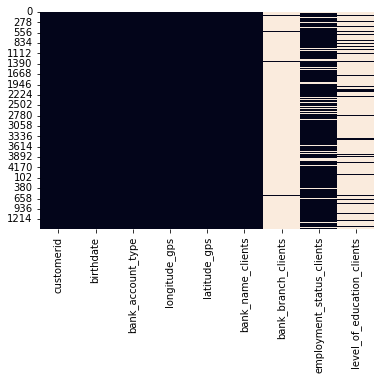

In [4]:
import seaborn as sns

df.isnull()
df.info(verbose=True,null_counts=True)
sns.heatmap(df.isnull(), cbar=False)

Como se puede observar, existen dos varibles con un gran número de valores faltantes. Por ello, se prodecerá a eliminar dichas columnas.

En la columna employment_status_clients se puede observar qye existen valores faltantes, por tanto serán sustituidos ya que no superan el 15%.

In [5]:
df["employment_status_clients"].fillna("Not known", inplace = True) 
df

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,Not known,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,Not known,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
...,...,...,...,...,...,...,...,...,...
1482,8a858fc25bafabdc015bb47fda0323e5,1976-04-13 00:00:00.000000,Savings,3.481190,6.442728,GT Bank,NaN,Permanent,NaN
1483,8a858e245c214660015c3397e4db389a,1990-10-24 00:00:00.000000,Savings,4.738209,8.179723,GT Bank,NaN,Permanent,NaN
1484,8a858e8b5bc9e7e6015bcd7374077f0c,1988-06-12 00:00:00.000000,Savings,3.424825,6.455802,First Bank,NaN,Permanent,NaN
1485,8a858f2e5c699f3a015c77aa22ed7f23,1974-03-23 00:00:00.000000,Savings,3.318851,7.113212,FCMB,NaN,Permanent,NaN


A continuación, se obtendrá la edad de los clientes a través de la columna birthdate.

In [8]:
df.birthdate = pd.to_datetime(df.birthdate)

def age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['birthdate'].apply(lambda x: age(x))

In [13]:
# !pip3 install geocoder

In [14]:
# import geocoder

# def geo_rev(x):
#     g = geocoder.osm([x.latitude_gps, x.longitude_gps], method='reverse').json
#     if g:
#         return g.get('country')
#     else:
#         return 'no country'
    
# df[['latitude_gps', 'longitude_gps']].apply(geo_rev, axis=1)

In [15]:
# Creamos las variables binarias
bank_account_type = pd.get_dummies(df['bank_account_type'], drop_first = True)
bank_name_clients = pd.get_dummies(df['bank_name_clients'], drop_first = True)
employment_status_clients = pd.get_dummies(df['employment_status_clients'], drop_first = True)
#country = pd.get_dummies(df['country'], drop_first = True)

In [16]:
# Añadimos las variables binarias al DataFrame
df = pd.concat([df, bank_account_type,bank_name_clients,employment_status_clients], axis = 1) #faltarà añadir country

# Eliminamos las varables originales y las que no necesitamos
df.drop(['bank_branch_clients', 'bank_name_clients','employment_status_clients','longitude_gps','latitude_gps','level_of_education_clients','birthdate','bank_account_type'], axis=1, inplace = True)
df

,customerid,age,Other,Savings,Diamond Bank,EcoBank,FCMB,Fidelity Bank,First Bank,GT Bank,...,Union Bank,Unity Bank,Wema Bank,Zenith Bank,Not known,Permanent,Retired,Self-Employed,Student,Unemployed
0,8a858e135cb22031015cbafc76964ebd,48,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,8a858e275c7ea5ec015c82482d7c3996,36,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8a858e5b5bd99460015bdc95cd485634,35,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8a858efd5ca70688015cabd1f1e94b55,30,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,8a858e785acd3412015acd48f4920d04,39,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,8a858fc25bafabdc015bb47fda0323e5,46,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1483,8a858e245c214660015c3397e4db389a,31,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1484,8a858e8b5bc9e7e6015bcd7374077f0c,33,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1485,8a858f2e5c699f3a015c77aa22ed7f23,48,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
df.to_csv('../files/datosdemograficos_limpio.csv', index=False)